<a href="https://colab.research.google.com/github/RiyaP49/1310DRiyaP/blob/main/FinalGroupCodingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our ml model will predict which gender, race, age group, times, and borough are most suseptible to being shooting victims. This way the NYPD can send more surveillance to protect

In [70]:
import numpy as np #import libraries
import pandas as pd
from inspect import BoundArguments
from pandas.core.api import DataFrame


df = pd.read_csv("NYPD_Shooting_Incident_Data.csv") #read csv with pandas and print first 5 rows
df.head()


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025)
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006)
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,NaN,NaN,25-44,M,WHITE,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004)
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,NaN,NaN,<18,M,WHITE HISPANIC,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003)
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,M,BLACK,45-64,M,BLACK,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006)


In [60]:
borough = df["BORO"] #define where borough column is in our csv



In [61]:
from matplotlib import pyplot as plt


<Axes: >

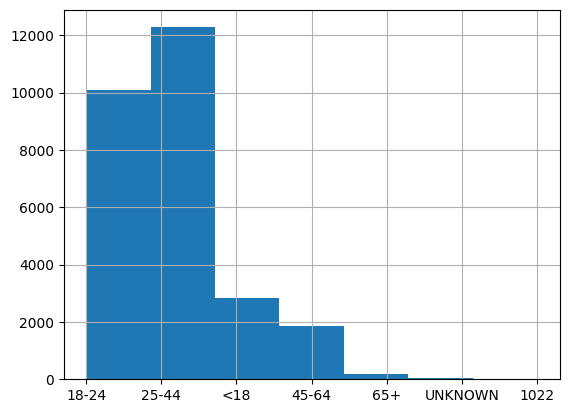

In [71]:
vic_age = df["VIC_AGE_GROUP"] #create histogram of victim age group with 7 bins (using matplotlib)
vic_age.hist(bins = 7)

<Axes: >

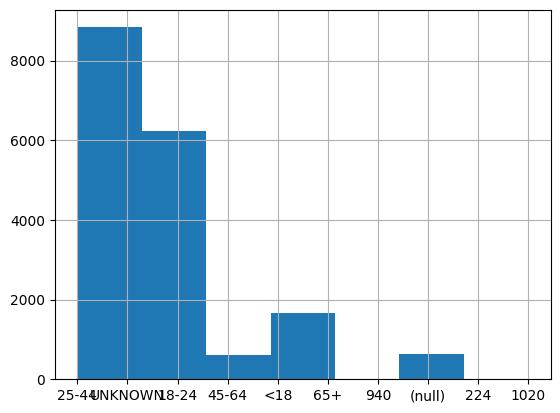

In [72]:
perp_age = df["PERP_AGE_GROUP"] #create histogram of perpertrator age group with 7 bins (using matplotlib) - 7 bins in each for interoperability with victim age group
perp_age.hist(bins = 7)

<Axes: >

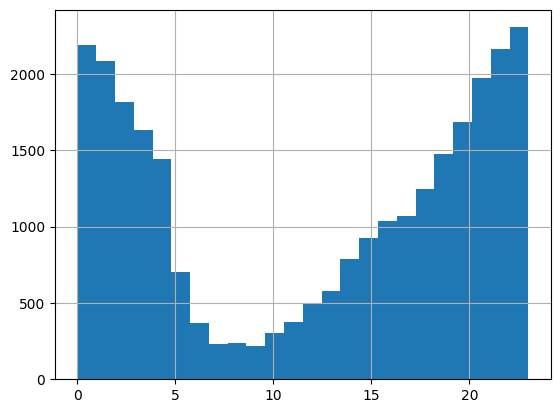

In [64]:
time = pd.to_datetime(df["OCCUR_TIME"]) #create histogram of occurance time with 24 bins (using matplotlib)
hour = time.dt.hour

hour.hist(bins = 24) #24 bins to equate to military time



<Axes: >

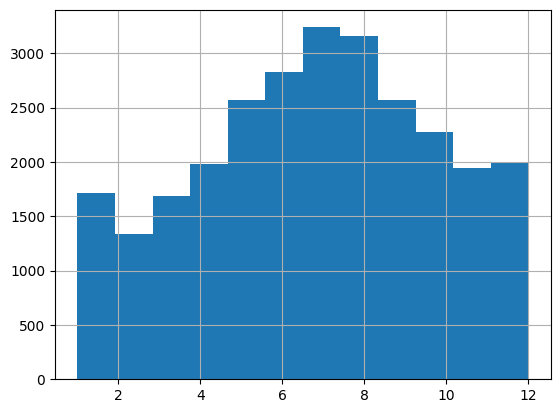

In [65]:
date = pd.to_datetime(df["OCCUR_DATE"]) #create histogram of occurance date with 12 bins (using matplotlib)
month = date.dt.month

month.hist(bins = 12) #12 bins for each month

In [66]:

#df = df.dropna()
#show features of interest
train_features = df[[ "BORO",
                     'PERP_SEX', 'PERP_AGE_GROUP',  'PERP_RACE',
                     "VIC_AGE_GROUP",  "VIC_SEX", "VIC_RACE"]]

train_labels = df["STATISTICAL_MURDER_FLAG"]


Where we learned about the map command: https://realpython.com/python-map-function/

In [67]:
def transform_sex (sex_column): #transform sex column to make binary
  sex_column = sex_column.map({'M': 0, 'F': 1}) #from chatGPT
  return sex_column #from chatGPT, previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error


vic_sex = train_features['VIC_SEX']
perp_sex = train_features['PERP_SEX']

transform_sex(vic_sex)
transform_sex(perp_sex)




0        NaN
1        NaN
2        NaN
3        NaN
4        0.0
        ... 
27307    NaN
27308    1.0
27309    0.0
27310    0.0
27311    0.0
Name: PERP_SEX, Length: 27312, dtype: float64

In [68]:
def transform_age(age_column):
  return age_column.map({ #from chatGPT
        "<18": 0, #from chatGPT
        "18-24": 1, #from chatGPT
        "25-44": 2, #from chatGPT
        "45-64": 3, #from chatGPT
        "65+": 4 #from chatGPT
    }) #from chatGPT , previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error


vic_age = train_features['VIC_AGE_GROUP']
perp_age = train_features['PERP_AGE_GROUP']

transform_age(vic_age)
transform_age(perp_age)




0        NaN
1        NaN
2        NaN
3        NaN
4        2.0
        ... 
27307    NaN
27308    2.0
27309    1.0
27310    2.0
27311    1.0
Name: PERP_AGE_GROUP, Length: 27312, dtype: float64

In [69]:

def transform_race(race_column):
  race_mapping = { #from chatGPT
        'WHITE': 0, #from chatGPT
        'BLACK': 1, #from chatGPT
        'WHITE HISPANIC': 2, #from chatGPT
        'BLACK HISPANIC': 3, #from chatGPT
        'ASIAN / PACIFIC ISLANDER': 4, #from chatGPT
        'AMERICAN INDIAN/ALASKAN NATIVE': 5 #from chatGPT
    } #from chatGPT
  return race_column.map(race_mapping) #from chatGPT , previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error



vic_race = train_features['VIC_RACE']
perp_race = train_features['PERP_RACE']

transform_race(vic_race)
transform_race(perp_race)


0        NaN
1        NaN
2        NaN
3        NaN
4        1.0
        ... 
27307    NaN
27308    2.0
27309    1.0
27310    1.0
27311    1.0
Name: PERP_RACE, Length: 27312, dtype: float64

In [49]:


def transform_borough(borough):
  borough_mapping = { #from chatGPT
        'QUEENS': 0, #from chatGPT
        'BRONX': 1, #from chatGPT
        'BROOKLYN': 2, #from chatGPT
        'MANHATTAN': 3, #from chatGPT
        'STATEN ISLAND': 4 #from chatGPT
    } #from chatGPT
  return borough.map(borough_mapping) #from chatGPT , previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error


borough = train_features['BORO']

#data_transformation(perp_sex)
transform_borough(borough)


train_features = train_features.dropna()


In [58]:

def clean_and_save_data(input_file_path, output_file_path):
    # Read the CSV file into a Pandas DataFrame
    data = pd.read_csv(input_file_path)

    data.dropna()

    # Transform 'M' to 0 and 'F' to 1, drop rows with unknown/null values
    data = data[data['VIC_SEX'].isin(['M', 'F'])].copy()
    data['VIC_SEX'] = data['VIC_SEX'].map({'M': 0, 'F': 1})

    data = data[data['PERP_SEX'].isin(['M', 'F'])].copy()
    data['PERP_SEX'] = data['PERP_SEX'].map({'M': 0, 'F': 1})

    # Keep only the specified columns
    selected_columns = ['OCCUR_DATE', 'BORO', 'PRECINCT', 'PERP_RACE', 'VIC_RACE', 'VIC_SEX', 'PERP_SEX']
    data = data[selected_columns].copy()

    # Convert everything to floats
    data = data.apply(pd.to_numeric, errors='coerce')

    # Save the cleaned data to a new CSV file
    data.to_csv(output_file_path, index=False)

    # Print the table
    print(data)

# Replace 'path/to/your/input/file.csv' and 'path/to/your/output/file.csv' with your actual file paths
clean_and_save_data('NYPD_Shooting_Incident_Data.csv', 'Cleaned_NYPD_Shooting_Incident_Data.csv')


       OCCUR_DATE  BORO  PRECINCT  PERP_RACE  VIC_RACE  VIC_SEX  PERP_SEX
4             NaN   NaN        47        NaN       NaN        0         0
9             NaN   NaN       101        NaN       NaN        0         0
11            NaN   NaN        75        NaN       NaN        0         0
15            NaN   NaN        47        NaN       NaN        0         0
16            NaN   NaN        30        NaN       NaN        0         0
...           ...   ...       ...        ...       ...      ...       ...
27306         NaN   NaN        41        NaN       NaN        1         0
27308         NaN   NaN        30        NaN       NaN        0         1
27309         NaN   NaN        32        NaN       NaN        0         0
27310         NaN   NaN        46        NaN       NaN        0         0
27311         NaN   NaN        45        NaN       NaN        0         0

[15856 rows x 7 columns]


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)


# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

ValueError: ignored

In [ ]:
from sklearn.metrics import accuracy_score

#load test data
test_df = pd.read_csv("test.csv")

# Extract the input features
test_inputs = test_df[[ "BORO", "PERP_AGE_GROUP",
              "PERP_SEX", "PERP_RACE", "VIC_AGE_GROUP",  "VIC_SEX", "VIC_RACE"]]

y_actual = test_df["STATISTICAL_MURDER_FLAG"]

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using logistic regression model
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

Aamina code from class Data curation, and then also from chatGPT.


## 1. Import libraries (install if needed)

In [ ]:
# Check if beautifulsoup and pandas are already installed
# If not, install it and then import

try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

## 2. Read the csv data and parse it with BeautifulSoup

In [ ]:
import pandas as pd

csv_file_path = 'NYPD_Shooting_Incident_Data.csv'

# Read data from the CSV file using pandas
data = pd.read_csv(csv_file_path)

# Print a message to indicate that the CSV file has been loaded successfully
print("CSV file loaded successfully...")

# Continue with BeautifulSoup code (if needed)
# Initialize a BeautifulSoup object to read and parse the CSV data
# This is like calling the __init__ function in BeautifulSoup
# Note: BeautifulSoup is typically used for HTML parsing, not CSV parsing
# This is just for demonstration purposes; you might not actually need BeautifulSoup for CSV data.
# bs = BeautifulSoup(data.to_html(), "html.parser")


Print and extract raw data

In [ ]:
import pandas as pd

csv_file_path = 'NYPD_Shooting_Incident_Data.csv'

# Read data from the CSV file using pandas
data = pd.read_csv(csv_file_path)

# Print a message to indicate that the CSV file has been loaded successfully
print("CSV file loaded successfully...")

# Print the raw data
print("Raw Data:")
print(data)


In [ ]:
def transform_sex (sex_column): #transform sex column to make binary
  sex_column = sex_column.map({'M': 0, 'F': 1}) #from chatGPT
  return sex_column #from chatGPT, previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error
  # for i in range (len(sex_column)):
  #   if sex_column[i] == 'M':
  #     sex_column[i] = 0
  #   elif sex_column[i] == 'F':
  #     sex_column[i] = 1
  #   else:
  #     sex_column.drop(i)

vic_sex = train_features['VIC_SEX']
perp_sex = train_features['PERP_SEX']

transform_sex(vic_sex)
transform_sex(perp_sex)




## Clean and transform data

In [ ]:
import pandas as pd

def transform_sex(sex_column):
    # Transform sex column to make binary
    sex_column = sex_column.map({'M': 0, 'F': 1})
    return sex_column

# Assuming train_features is your DataFrame
file_path = '/content/NYPD_Shooting_Incident_Data.csv'  # Update this with the actual path to your CSV file
train_features = pd.read_csv(file_path)

vic_sex = train_features['VIC_SEX']
perp_sex = train_features['PERP_SEX']

# Apply the transform_sex function to 'VIC_SEX' and 'PERP_SEX' columns
vic_sex_transformed = transform_sex(vic_sex)
perp_sex_transformed = transform_sex(perp_sex)

# Select only the desired columns
selected_columns = ['OCCUR_DATE', 'BORO', 'PRECINCT', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',  'VIC_AGE_GROUP',  'VIC_SEX', 'VIC_RACE']
cleaned_data = train_features[selected_columns].copy()

# Drop unnecessary columns
unnecessary_columns = [
    'INCIDENT_KEY', 'OCCUR_TIME', 'LOC_OF_OCCUR_DESC', 'JURISDICTION_CODE',
    'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
     'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'
]
cleaned_data.drop(columns=unnecessary_columns, errors='ignore', inplace=True)

# Filter out rows with null/unknown values
cleaned_data = cleaned_data.dropna()

# Save the cleaned and transformed data to a new CSV file
output_file_path = '/content/clean_NYPD_Shooting_Incident_Data.csv'  # Update this with the desired path for the new CSV file
cleaned_data.to_csv(output_file_path, index=False)

# Display the path to the saved CSV file
print(f"\nCleaned and Transformed Data saved to: {output_file_path}")


In [ ]:
import pandas as pd

def transform_sex(sex_column):
    # Transform sex column to make binary
    sex_column = sex_column.map({'M': 0, 'F': 1})
    return sex_column

# Assuming train_features is your DataFrame
file_path = '/content/NYPD_Shooting_Incident_Data.csv'  # Update this with the actual path to your CSV file
train_features = pd.read_csv(file_path)

# Apply the transform_sex function to 'PERP_SEX' and 'VIC_SEX' columns
train_features['PERP_SEX'] = transform_sex(train_features['PERP_SEX'])
train_features['VIC_SEX'] = transform_sex(train_features['VIC_SEX'])

# Select only the desired columns
selected_columns = ['OCCUR_DATE', 'BORO', 'PRECINCT', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE',  'VIC_AGE_GROUP',  'VIC_SEX', 'VIC_RACE']
cleaned_data = train_features[selected_columns].copy()

# Drop unnecessary columns
unnecessary_columns = [
    'INCIDENT_KEY', 'OCCUR_TIME', 'LOC_OF_OCCUR_DESC', 'JURISDICTION_CODE',
    'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG',
     'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'
]
cleaned_data.drop(columns=unnecessary_columns, errors='ignore', inplace=True)

# Filter out rows with null/unknown values
cleaned_data = cleaned_data.dropna()

# Save the cleaned and transformed data to a new CSV file
output_file_path = '/content/clean_NYPD_Shooting_Incident_Data.csv'  # Update this with the desired path for the new CSV file
cleaned_data.to_csv(output_file_path, index=False)

# Display the path to the saved CSV file
print(f"Cleaned and Transformed Data saved to: {output_file_path}")

# Display the cleaned data in a table format
print("\nCleaned Data Table:")
print(cleaned_data.to_string(index=False))


This Python code performs cleaning and transformation on a dataset representing NYPD shooting incident data. Here's a step-by-step explanation:

1. **Read Data:**
   - Reads the data from the CSV file (`NYPD_Shooting_Incident_Data.csv`) into a Pandas DataFrame named `train_features`.

2. **Transform 'SEX' Column:**
   - Defines a function `transform_sex` to map 'M' to 0 and 'F' to 1.
   - Applies this transformation to the 'PERP_SEX' and 'VIC_SEX' columns in the `train_features` DataFrame.

3. **Select Desired Columns:**
   - Creates a new DataFrame named `cleaned_data` containing only the selected columns:
     - 'OCCUR_DATE', 'BORO', 'PRECINCT', 'PERP_AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE'.

4. **Drop Unnecessary Columns:**
   - Drops unnecessary columns from `cleaned_data`. These columns are:
     - 'INCIDENT_KEY', 'OCCUR_TIME', 'LOC_OF_OCCUR_DESC', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'.

5. **Convert 'SEX' to Binary:**
   - Applies the `transform_sex` function to the 'PERP_SEX' and 'VIC_SEX' columns in `cleaned_data` to ensure they are binary (0 for 'M' and 1 for 'F').

6. **Convert 'AGE' to Numeric:**
   - Converts the 'PERP_AGE_GROUP' and 'VIC_AGE_GROUP' columns in `cleaned_data` to numeric, handling any non-numeric values.

7. **Convert 'PRECINCT' to Numeric:**
   - Converts the 'PRECINCT' column in `cleaned_data` to numeric, handling any non-numeric values.

8. **Drop Rows with Null/Unknown Values:**
   - Drops rows containing null or unknown values from `cleaned_data`.

9. **Save Cleaned and Transformed Data:**
   - Saves the cleaned and transformed data to a new CSV file (`clean_NYPD_Shooting_Incident_Data.csv`).

10. **Print Information:**
    - Prints the path to the saved CSV file.
    - Prints the cleaned data in a table format without index.

In summary, the code takes the raw NYPD shooting incident data, transforms the 'SEX' column to binary, selects specific columns, drops unnecessary columns, converts relevant columns to numeric, removes rows with null values, and saves the cleaned data to a new CSV file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')